In [ ]:
# source: https://www.geeksforgeeks.org/classification-using-sklearn-multi-layer-perceptron/
# MLP Classifier - NOT quantum
# works with 99% accuracy!!!!

In [15]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

In [35]:
# # Load the Breast Cancer dataset
# cancer_data = load_breast_cancer()
# X, y = cancer_data.data, cancer_data.target

# # Split the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.2, random_state=42)

# print("X train:", X_train, "Y train: ", y_train)

In [36]:
X_train = np.loadtxt("trainX.txt")
y_train = np.loadtxt("trainY.txt")
X_test = np.loadtxt("testX.txt")
y_test = np.loadtxt("testY.txt")

In [37]:
# Feature Scaling - Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [38]:
# Create an MLPClassifier model - 2 hidden layers of the neural network's design: 64, 32 neurons
mlp = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)

In [39]:
# print("X train:", len(X_train), "Y train: ", len(y_train))
# Train the model on the training data
mlp.fit(X_train, y_train)
 
# Make predictions on the test data
y_pred = mlp.predict(X_test)
 
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.99


In [40]:
# Generate a classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       145
         1.0       1.00      0.97      0.99       111

    accuracy                           0.99       256
   macro avg       0.99      0.99      0.99       256
weighted avg       0.99      0.99      0.99       256



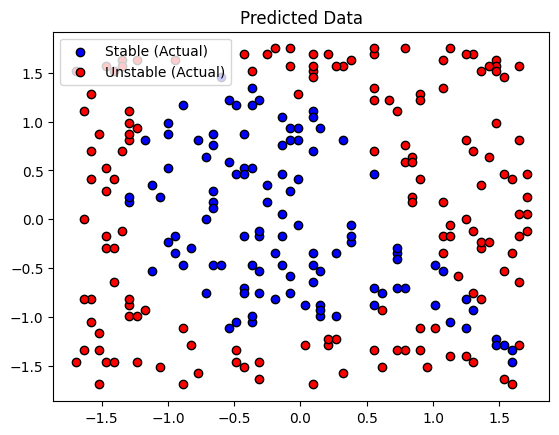

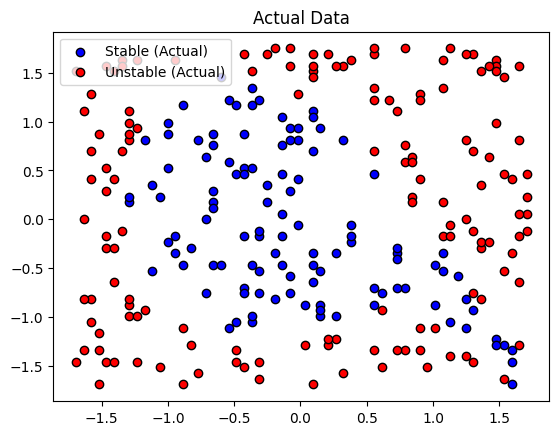

In [41]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(X_test[:, 0][y_pred == 1], X_test[:, 1][y_pred == 1], c="b", marker="o", ec="k", label='Stable (Actual)')
plt.scatter(X_test[:, 0][y_pred == 0], X_test[:, 1][y_pred == 0], c="r", marker="o", ec="k", label='Unstable (Actual)')
plt.title("Predicted Data")
plt.legend()
plt.show()

plt.figure()
plt.scatter(X_test[:, 0][y_test == 1], X_test[:, 1][y_test == 1], c="b", marker="o", ec="k", label='Stable (Actual)')
plt.scatter(X_test[:, 0][y_test == 0], X_test[:, 1][y_test == 0], c="r", marker="o", ec="k", label='Unstable (Actual)')
plt.title("Actual Data")
plt.legend()
plt.show()